# First pass analysis of line/loop data




## Try to predict whether a probe trial will be correct or not



The question we have to ask is what are they struggling to do right now? In the best case scenario, it is random, we would want these regressors 


### The full way of doing it

This is a Bernoulli regression problem (I think this is an easier way to think about it than a binomial). Build a model with the following regressors. (Do you want an animal performance regressor?)

<ol>
    <li> Source x target (too much??) </li>
    <li> Source to target distance </li>
    <li> Whether this transition exists in both graphs </li>
    <li> The task number that this is on </li>
    <li> Whether this is a line or a loop </li>
    <li> Marginal animal performance on day (?) </li>
    <li> Transition from that node on other graph </li>
    <li> Training day </li>
    <li> Session number </li>
    <li> Number of rewards already received (this could be interesting, could go both ways) </li>
    <li> Is to a reward or not? </li>
</ol>

<b> I think we want to fit this model to each day and see basically all regressors shrinking. </b>


### What is the simple thing to look at?

Ideally would want to look at whether there are some transitions that they are great at and some that they are shit at. The problem is that there is not enough data. Thats why the above approach is nice.


Plot the cumulative fraction of transitions where performance is below chance.

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
from statsmodels.stats import proportion
seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k'})
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")
sys.path.append("/Users/Yves/Documents/Code/")

clrs = seaborn.color_palette()

In [7]:
import mouse_poker as mpk
import yutils

# Defined functions 

In [3]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [4]:
def get_empty_transition_dict(n_nodes=9):
    tmp1 = [str(i[1])+str(i[-2]) for i in list(itertools.combinations(range(n_nodes+1),2))]
    tmp1.extend([i[::-1] for i in tmp1])
    res_dct = {}
    for i in tmp1:
        res_dct[i] = []
    return res_dct

# Actual code to run stuff 

In [5]:
#ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_1/"
#ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_2/"
ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_3/"

bb  = mpk.load.create_base_df(ROOT,rerun=True)
bb = mpk.load.load_df(ROOT)

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-09-30-101920.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-11-134011.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-01-144626.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-09-144604.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-10-30-145652.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-08-102403.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-10-16-135215.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-15-150829.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-10-19-143354.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-11-18-130856.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-26-160653.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-09-23-101837.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-09-29-145652.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-15-100826.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-14-150413.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_lo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-11-09-144604.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-06-101844.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-09-30-101920.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-14-102824.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-01-144626.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-09-25-093417.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-22-170042.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-09-14-110849.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-10-28-160153.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-10-06-144209.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-29-151825.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-11-134011.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-10-30-092441.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-09-144604.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-09-18-101320.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-11-04-150221.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-09-18-154056.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-11-12-134816.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-09-19-101603.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-20-092844.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_l

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-22-160643.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-09-29-093549.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-07-094241.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-09-14-105628.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-03-093245.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-26-160653.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-19-100918.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-20-092844.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-09-30-151247.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-09-16-154809.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_l

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-09-24-092240.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-09-23-101837.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-02-101445.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-10-16-095629.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-02-143454.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_lo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-10-12-094015.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-10-19-152833.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-09-19-153024.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-30-103652.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-26-103617.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-03-134044.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-09-17-155000.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-19-152833.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-10-07-093003.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-09-19-153024.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-10-29-092650.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-09-23-150407.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-09-23-101837.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-15-100826.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-09-29-145652.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-06-144209.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-09-22-154356.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-29-151825.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-09-14-110849.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-15-150829.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/lin

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-10-30-092441.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-09-18-101320.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-11-11-134011.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-11-06-101844.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-09-21-155345.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-09-21-104248.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-23-140707.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-13-145526.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-17-095305.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-09-16-103231.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-26-103617.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-30-103652.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-23-140858.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-10-09-152510.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-11-19-143230.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-10-08-153312.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-30-092441.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-09-14-110849.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-10-29-151825.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-11-16-143958.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-12-01-094514.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-25-102106.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-10-12-145754.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-11-25-135524.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-29-151510.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/l

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-28-100924.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-11-11-091835.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-20-095051.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-09-25-150249.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-12-094015.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-07-094241.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-09-25-150249.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-09-15-101632.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-09-21-102930.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-09-152147.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-09-25-093417.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-09-21-155345.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-05-094641.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-10-19-144717.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-09-152510.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-08-153312.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-11-27-134005.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-11-23-140707.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-14-150220.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-11-16-103753.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_lo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-11-05-092938.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/456765_3'-2020-09-14-105628.txt failed to load
Error message: EOL while scanning string literal (<string>, line 1)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_None'-2020-10-14-102824.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_None'-2020-11-18-130856.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_3'-2020-11-20-131241.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456675_3'-2020-10-02-144547.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-10-28-100924.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-05-133950.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'459849_None'-2020-11-12-093457.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-09-24-092240.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-10-12-145754.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_None'-2020-11-25-135524.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'460175_3'-2020-09-30-151247.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_33'-2020-11-03-134044.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_4/'456674_3'-2020-09-22-103003.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-11-144155.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-09-25-160132.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-11-16-093716.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-14-120721.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-09-091930.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-11-17-105659.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-30-100640.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-20-140154.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-28-150915.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-16-143307.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-09-28-134952.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-26-100007.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-10-14-115722.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-12-151449.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-09-144246.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-09-21-145929.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-27-143925.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-16-094631.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-19-093117.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-17-150158.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-09-135714.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-24-154811.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-06-153207.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-09-30-093222.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-22-093656.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-19-133725.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-02-093831.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-30-101948.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-19-093247.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-11-03-142511.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batc

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-10-21-132924.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-14-140843.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-06-093204.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-09-093337.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-22-151659.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-30-142116.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-25-110108.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-16-133506.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-28-150257.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-09-15-132532.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_b

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-11-16-134445.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-06-093204.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-20-140154.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-28-145135.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-09-21-093905.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-11-16-133506.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-09-19-093247.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-19-132622.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-11-02-134707.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-11-144155.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_b

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-11-02-092724.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-03-142511.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-25-160132.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-11-27-151438.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-10-13-093204.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_b

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-11-26-131034.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-26-092020.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-12-151449.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-04-142120.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-20-104952.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batc

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-10-21-132924.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-10-20-101704.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-23-155458.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-10-12-135944.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-07-103552.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batc

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-25-130723.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-09-21-093509.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-10-16-104339.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-28-105351.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-09-22-144934.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-20-101704.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-29-102537.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-10-29-101408.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-10-15-092240.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-10-26-150434.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-11-12-151449.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-09-28-104503.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-09-25-105253.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-09-25-105931.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-09-15-132532.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batc

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-11-04-092726.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-20-140453.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-27-143925.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-28-151559.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-17-105659.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_b

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-16-143307.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-09-25-102841.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-28-092531.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-15-093358.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-10-20-140154.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-26-100007.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-14-121447.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-08-145036.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-10-12-101908.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-16-133723.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-19-133725.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-19-140752.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-09-14-142242.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-10-05-103332.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-11-02-134707.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_bat

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-09-30-142116.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-06-145948.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-09-23-092746.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-09-25-102841.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-09-30-092028.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batc

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-05-103332.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-10-101800.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-20-101030.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-11-11-144155.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-21-093905.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loo

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-10-30-100640.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-11-27-143925.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-16-144254.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-17-094637.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-09-19-093247.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-29-160327.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-19-092213.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-25-105931.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-30-100453.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-06-093204.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-21-093430.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-01-154334.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-18-155138.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-23-092746.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-12-135507.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-09-21-145929.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-25-105931.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-30-100453.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-17-150158.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-11-19-093117.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-09-23-092746.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-09-25-102841.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-09-24-100014.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-23-145612.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-12-103911.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_ba

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-09-17-095034.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-05-103332.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-11-17-105659.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-11-10-101800.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-11-06-093204.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_

Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-09-23-155458.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-07-103552.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-22-093440.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-10-09-144246.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-11-26-131034.txt failed to load
Error message: too many values to unpack (expected 4)
Warning, /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch

In [13]:
good_df = bb.loc[bb['nRews']>20]

In [14]:
allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict = {**allR_dict_1, **allR_dict_2}


In [15]:
THRESHT = 20.

allRes = []
frac_not_yet = []
frac_not_yet2 = []


tdict = get_empty_transition_dict()


allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict = {**allR_dict_1, **allR_dict_2}


allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_lat = {**allR_dict_1, **allR_dict_2}

all_summary_dict= []
for date in np.unique(good_df['date']):
    sys.stdout.write("\r{}".format(date))
    day_df = good_df.loc[good_df['date']==date]
    if True:#'forced' in day_df['task_name'].values[0]:
        

        bin_ms = 1
        bin_mult = 1000/bin_ms


        poked_in_probe = []
        poked_correct = []
        poked_correctR = []
        poked_correctNR = []

        res = {'pkA':[],
               'pkR':[],
               'pkNR':[],
               'pkA2':[],
               'pkR2':[],
               'pkNR2':[],
               'pkFrac': [],
               'pkFR': [],
               'graph_type':[],
               'graph_id':[],
               'task_nr': [],
               'subject_id': []}


        try:
            for fpath in day_df['filepath'].values:
                
                f = open(fpath,'r')

                lines = f.readlines()
                dat_dict,events,event_times,nRews = mpk.load.parse_data(lines,None)
                out = mpk.load.get_metadata(lines)
                experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,summary_dict = out
                summary_dict['task_name'] = task_name
                summary_dict['date'] = date
                all_summary_dict.append(summary_dict)
                
                
                if 'probe_duration' in summary_dict:
                    window_s = 1.#float(summary_dict['probe_duration'])/1000.
                else:
                    window_s  = 1.

                
                res['graph_type'].append(lineloop);res['graph_id'].append(graph);res['task_nr'].append(task_nr)
                res['subject_id'].append(subject_id)

                
                inPokes,inPoke_t,outPoke_t,poke_dur = mpk.proc.get_pokes(events,event_times,bin_mult)

                inPoke_t = inPoke_t[poke_dur>THRESHT]; inPokes = inPokes[poke_dur>THRESHT]
                isProbe = np.array([i[-1] for i in dat_dict['port']])

                poked_in_probe = []
                poked_correct = []
                poked_correctR = []
                poked_correctNR = []

                probe_ixs = np.where(isProbe)[0]
                #print('number of probe trials:{}'.format(len(probe_ixs)))
                for ix in np.where(isProbe)[0]:
                    t_str = str(dat_dict['port'][ix][0]) + str(dat_dict['port'][ix][1])
                    probeT = int(dat_dict['port'][ix][-2]*bin_mult)

                    prevPk = dat_dict['port'][ix][0]
                    target = dat_dict['port'][ix][1]

                    #these are pokes in window before light comes on
                    ixs = (np.where((inPoke_t>probeT) *
                                   (inPoke_t<(probeT+(window_s*bin_mult))))[0])# *

                    
                    if len(ixs)>0:
 
                        use2 = [i for i in inPokes[ixs] if i!=prevPk]
                        if len(use2)>0:
                            poked_in_probe.append(1)
                            #if target in inPokes[ixs]:
                            if target==use2[0]:
                                allR_dict[subject_id+'_'+str(task_nr)][t_str].append(1)
                                if target in [0,3,5,8]:
                                    poked_correctR.append(1)
                                    tdict[t_str].append(1)
                                else:
                                    poked_correctNR.append(1)
                                    tdict[t_str].append(1)
                                poked_correct.append(1)
                            else:
                                allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)
                                if target in [0,3,5,8]:
                                    poked_correctR.append(0)
                                    tdict[t_str].append(0)
                                else:
                                    poked_correctNR.append(0)
                                    tdict[t_str].append(0)
                                poked_correct.append(0)
                                
                        else:
                            poked_in_probe.append(0)
                            allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)
                            poked_correct.append(0)
                            if target in [0,3,5,8]: 
                                poked_correctR.append(0)
                            else:
                                poked_correctNR.append(0)
                            

                        
                        
                    else:
                        poked_correct.append(0)
                        if target in [0,3,5,8]:
                            poked_correctR.append(0)
                        else:
                            poked_correctNR.append(0)
                        
                        poked_in_probe.append(0)
                        tdict[t_str].append(0)
                        allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)

                res['pkA'].append(poked_correct)
                res['pkR'].append(poked_correctR)
                res['pkNR'].append(poked_correctNR)
                res['pkFrac'].append(poked_in_probe)

                res['pkA2'].append([i for j in res['pkA'] for i in j])
                res['pkR2'].append([i for j in res['pkR'] for i in j])
                res['pkNR2'].append([i for j in res['pkNR'] for i in j])
                res['pkFR'].append([i for j in res['pkFrac'] for i in j])
                
              
                for ii,jj in zip(dat_dict['port'][1:-1],dat_dict['port'][2:]):
                    t_str = str(ii[0]) + str(ii[1])
                    allR_dict_lat[subject_id+'_'+str(task_nr)][t_str].append(jj[2]-ii[2])
    
                
                
            allRes.append(res)
        except ValueError:
            print("\nWARNING FAILURE FOR {}\n".format(fpath))
        
        mu_transs = []
        mu_transs2 = []
        for ijk,k_ in enumerate(allR_dict.keys()):
            for k,v in allR_dict[k_].items():
                #print(k,)
                if len(v)>0:
                    mu_transs.append(stt.binom_test(np.sum(v[-20:]),len(v[-20:]),p=1/9.,alternative='greater')<0.05)
                    mu_transs2.append(len(mu_transs)>50)
        frac_not_yet.append(np.sum(mu_transs))
        frac_not_yet2.append(np.sum(mu_transs2))

2020-10-22T00:00:00.000000000
WARNING FAILURE FOR /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-22-151659.txt

2020-11-17T00:00:00.000000000
WARNING FAILURE FOR /Users/yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-11-17-105659.txt



In [20]:
sd['task_name']

'transition_task_yw_forced_PC'

In [79]:
ans = [sd['subject_id'] for sd in all_summary_dict if 'subject_id' in sd.keys()]
all_sm_dcts = []
for an in np.unique(ans):
    
    sum_dcts_an = []
    for sd in all_summary_dict:
        if 'nStates' in sd.keys():
            if 'subject_id' in sd.keys():
                if sd['subject_id']==an:
                    sum_dcts_an.append([sd['nStates'],sd['graph_type']])

    all_sm_dcts.append(sum_dcts_an)

In [ ]:
all

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


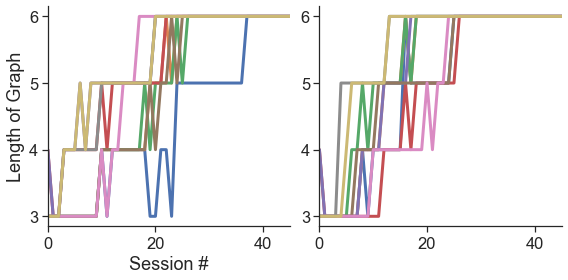

In [76]:
plt.figure(figsize=(8,4))
clrs2 = seaborn.color_palette(n_colors=9)
kkk = 0
for dct in all_sm_dcts:
    if not all([type(i[0])==int for i in dct]):
        dct2 = []
        for i in dct:
            if type(i[0])==int:
                dct2.append([i[0],i[0]])
            else:
                dct2.append(i[0])
        #st = '..' if dct[0]=='loop' else '-'
        #print(dct[1])
        plt.subplot(1,2,1)       
        plt.plot([i[0] for i in dct2],color=clrs2[kkk],linestyle=st,linewidth=3)
        plt.xlim(0,45)
        plt.xlabel("Session #")
        plt.ylabel("Length of Graph")

        plt.subplot(1,2,2)
        plt.plot([i[1] for i in dct2],color=clrs2[kkk],linewidth=3)
        plt.xlim(0,45)

        kkk += 1
seaborn.despine()
#plt.xlabel("Session #")
#plt.ylabel("Length of Graph")
plt.tight_layout()

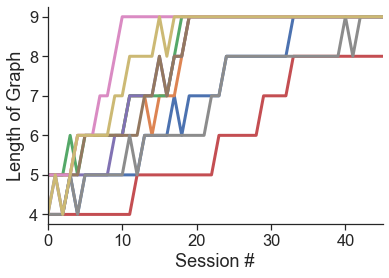

In [83]:
for dct in all_sm_dcts:
    if all([type(i[0])==int for i in dct]):
        #st = '--' if dct[1]=='loop' else '-'
        plt.plot([i[0] for i in dct],linewidth=3)
plt.xlim(0,45)
plt.xlabel("Session #")
plt.ylabel("Length of Graph")
seaborn.despine()

In [218]:
"""#dIx = 
res_new = [[],[],[],[]]

for ix__ in range(10,20):
    for gid_,perf_ in zip(allRes[ix__]['graph_id'],[np.mean(i) for i in allRes[ix__]['pkA']]):
        if gid_=='G1_0':
            res_new[0].append(perf_)
        if gid_ in ('G1_1','G2_0'):
            res_new[1].append(perf_)
        if gid_ in ('G2_1','G3_0','G4_1'):
            res_new[2].append(perf_)
        if gid_ in ('G3_1','G4_0'):
            res_new[3].append(perf_)"""
1

1

In [219]:
ix__ = -3
all_subjects= np.unique(allRes[ix__]['subject_id'] )
res_new = np.zeros([len(all_subjects),2])

for ix in range(len(allRes[ix__]['graph_id'])):
    subject = np.where(all_subjects==allRes[ix__]['subject_id'][ix])[0]
    giD = int(allRes[ix__]['task_nr'][ix]) - 1
    res_new[subject,giD] = [np.mean(i) for i in allRes[ix__]['pkA']][ix]
#res_new = []

IndexError: list index out of range

In [220]:
np.mean(res_new)

NameError: name 'res_new' is not defined

In [221]:
all_lats = []
all_fc = []
for subject_id in np.unique(good_df['mouse_ID']):
    for task_nr in range(1,3):
        task_nr = str(task_nr)
        for k,v in allR_dict_lat[subject_id+'_'+task_nr].items():
            if v:
                all_lats.append(np.median([i for i in v[-20:] if i<=2]))

        for k,v in allR_dict[subject_id+'_'+task_nr].items():
            if v:
                all_fc.append(np.mean(v[-20:]))

In [222]:
r,pval = yutils.cc_pval(all_lats,all_fc)

In [223]:
pval

99.98

(0.2, 2)

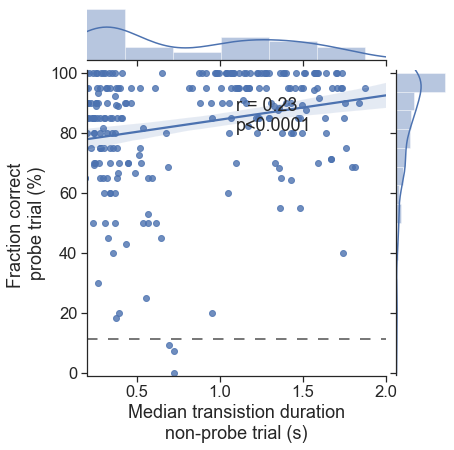

In [224]:
seaborn.jointplot(all_lats,np.array(all_fc)*100,kind='reg')
plt.axhline(y=100/9.,dashes=(7,7),color='.3')
plt.gca().annotate("r = {:.2f} \np<0.0001".format(r),(.5,.8),xycoords='axes fraction')
plt.xlabel("Median transistion duration\nnon-probe trial (s)")
plt.ylabel("Fraction correct \nprobe trial (%)")
plt.ylim(-1,101)
plt.xlim(0.2,2)


In [225]:
#seaborn.distplot(all_fc,kde=0,bins=17)

In [226]:
mu_transs = []
for ijk,k_ in enumerate(allR_dict.keys()):
    for k,v in allR_dict[k_].items():
        #print(k,)
        if len(v)>0:
            #print(len(v))
            v = v[-50:]
            mu_transs.append(stt.binom_test(np.sum(v),len(v),p=1/9.)<0.05)


In [227]:
v

[]

[0.98360656 0.99180328]


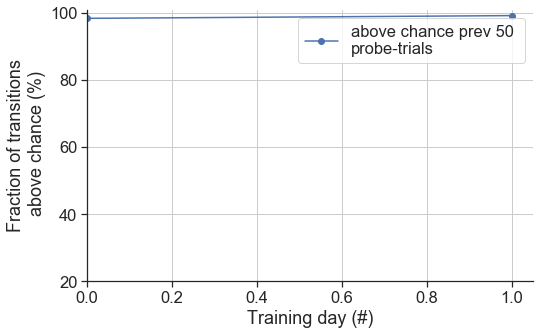

In [228]:
plt.figure(figsize=(8,5))

normC = len(mu_transs)-5#450 if 'cohort_1' in ROOT else 158

plt.plot(100*np.array(frac_not_yet)/normC,marker='o',label='above chance prev 50 \nprobe-trials')
ax = plt.gca()
#ax2 = plt.gca().twinx()
#ax.plot(100*np.array(frac_not_yet2)/400.,marker='o',color=clrs[1],label='>50 probe trials')
ax.set_ylabel("Fraction of transitions\n above chance (%)")
ax.set_xlabel("Training day (#)")
plt.xlim(0)
plt.ylim(20,101)
plt.legend()
print(np.array(frac_not_yet[-5:])/normC)
plt.grid()
seaborn.despine(top=True)

[0.96385542 0.95983936]


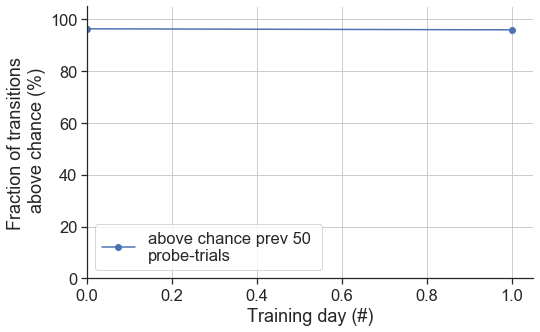

In [180]:
plt.figure(figsize=(8,5))

normC = len(mu_transs)#450 if 'cohort_1' in ROOT else 158

plt.plot(100*np.array(frac_not_yet)/normC,marker='o',label='above chance prev 50 \nprobe-trials')
ax = plt.gca()
#ax2 = plt.gca().twinx()
#ax.plot(100*np.array(frac_not_yet2)/400.,marker='o',color=clrs[1],label='>50 probe trials')
ax.set_ylabel("Fraction of transitions\n above chance (%)")
ax.set_xlabel("Training day (#)")
plt.xlim(0)
plt.ylim(0,105)
plt.legend()
print(np.array(frac_not_yet[-5:])/normC)
plt.grid()
seaborn.despine(top=True)

In [229]:
mu_transs = []
for ijk,k_ in enumerate(allR_dict.keys()):

    for k,v in allR_dict[k_].items():
        #print(k,)
        if len(v)>0:
            mu_transs.append(np.mean(v)>.2)


In [230]:
len(mu_transs)

249

In [231]:
def probe_trial_outcomes(dat_dict,bin_mult=1000,window_s=1.,t_dict=None):
    """ In this notebook track the outcome of probe trials"""
    
    if t_dict is None: tdict = get_empty_transition_dict()

    
    probe_ixs = np.where(np.array([i[-1] for i in dat_dict['port']]))[0]
    
    
    for ix in probe_ixs:
        
        
        probeT = int(dat_dict['port'][ix][-2]*bin_mult) #timestamp of probe trial

        prevPk = dat_dict['port'][ix][0]; target = dat_dict['port'][ix][1]
        
        t_str = str(prevPk) + str(target)


        #these are pokes in window before light comes on
        inprobe_ixs = np.where((inPoke_t>probeT) *(inPoke_t<(probeT+(window_s*bin_mult))))[0]# *

        
        if len(inprobe_ixs)>0:

            #use2 = [i for i in inPokes[ixs] if i!=prevPk]
            use2 = inPokes[inprobe_ixs]
            if len(use2)>0:

                if target in inPokes[inprobe_ixs]:
                    if target in [0,3,5,8]:
                        poked_correctR.append(1)
                        tdict[t_str].append(1)
                        allR_dict[subject_id][t_str].append(1)
                    else:
                        poked_correctNR.append(1)
                        tdict[t_str].append(1)
                        allR_dict[subject_id][t_str].append(1)
                    poked_correct.append(1)
                else:
                    if target in [0,3,5,8]:
                        poked_correctR.append(0)
                        tdict[t_str].append(0)
                        allR_dict[subject_id][t_str].append(0)
                    else:
                        poked_correctNR.append(0)
                        tdict[t_str].append(0)
                        allR_dict[subject_id][t_str].append(0)
                    poked_correct.append(0)

            else:
                allR_dict[subject_id][t_str].append(0)

            poked_in_probe.append(1)
        else:
            poked_correct.append(0)
            if target in [0,3,5,8]:
                poked_correctR.append(0)
            else:
                poked_correctNR.append(0)

            poked_in_probe.append(0)
            #tdict[t_str].append(0)
            allR_dict[subject_id][t_str].append(0)
            
    return poked_correctR, poked_correctNR, t_dict

In [232]:
fC = []
regs2 = []
mouse_list = np.unique([i[:-2] for i in list(allR_dict.keys())]).tolist()
for ijk,k_ in enumerate(allR_dict.keys()):

    for k,v in allR_dict[k_].items():
        if len(v)>0:

            v = np.array(v)
            
            t1_,t2_ = int(k[0]),int(k[1])
            t1 = np.zeros(9); t1[t1_] = 1
            t2 = np.zeros(9); t2[t2_] = 1
            mReg = np.zeros(18); mReg[mouse_list.index(k_[:-2])-1] = 1
            dst = np.array(poke_pos[t1_])-np.array(poke_pos[t2_])
            isR = [t1_ in [0,3,5,8]]
            #isBelow = [dst[0]<0]
            absDst = np.abs(dst)
            regs2.append(np.hstack([t1,t2,absDst,isR,mReg,[k_[-1]==1]]))
            fC.append([np.sum(v[-50:]),np.sum(v[-50:]==0)])

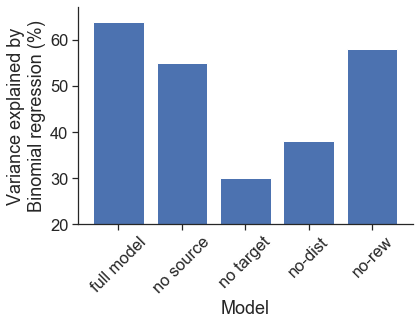

In [233]:
plt.bar(range(5), [64,55,30,38,58])
plt.ylabel("Variance explained by\nBinomial regression (%)")
plt.xticks(range(5),['full model','no source','no target','no-dist','no-rew'],rotation=45)
plt.xlabel("Model")
plt.ylim(20)
seaborn.despine()

In [234]:
fc = []
regs = []
for kk,i in enumerate(fC):
    if np.sum(i)>10:
        fc.append(i)
        regs.append(regs2[kk])

In [235]:
DM = np.vstack([np.hstack(i) for i in regs])
fc = np.array(fc)

In [236]:
import statsmodels.api as sm

glm_binom = sm.GLM(fc,DM, family=sm.families.Binomial())

In [237]:
res = glm_binom.fit()

In [238]:
print('Fraction of explained deviance: {:.2f}%'.format(1-res.llf/res.llnull))

Fraction of explained deviance: 0.39%


In [239]:
print('Fraction of explained deviance: {:.2f}%'.format(1-res.llf/res.llnull))

Fraction of explained deviance: 0.39%


Text(0, 0.5, 'Mean parameter weight')

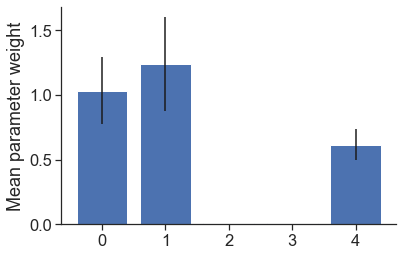

In [240]:
y = [np.mean(np.abs(res.params[:9])),
   np.mean(np.abs(res.params[9:18])),
   np.abs(res.params[18]),
   np.abs(res.params[19]),
   np.mean(np.abs(res.params[19:]))]


yerr = [stt.sem(np.abs(res.params[:9])),
                   stt.sem(np.abs(res.params[9:18])),
                   0,
                   0,
                   stt.sem(np.abs(res.params[19:]))]
plt.bar(range(5),y,yerr=yerr)
#plt.xticks(range(5),['source','target','distance',''],rotation=45)
seaborn.despine()
plt.ylabel("Mean parameter weight")
#plt.

In [241]:
[stt.sem(np.abs(res.params[:9])),
                   stt.sem(np.abs(res.params[9:18])),
                   np.abs(res.params[18]),
                   np.abs(res.params[19]),
                   stt.sem(np.abs(res.params[19:]))]

[0.2564985018220596,
 0.36290656181234593,
 0.009779938066849177,
 0.007634665330276289,
 0.12061494122336665]

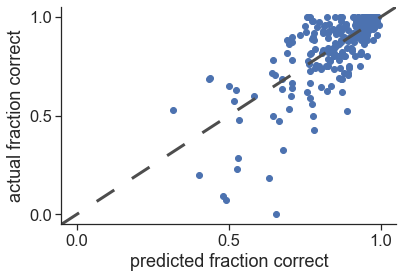

In [242]:
fc_plot = fc[:,0]/np.sum(fc,axis=1)
e = 0.05
plt.scatter(res.mu,fc_plot)
plt.plot([0-e,1+e],[0-e,1+e],color='.3',linewidth=3,dashes=(7,7))
plt.xlim(0-e,1+e)
plt.ylim(0-e,1+e)
seaborn.despine()
plt.xlabel('predicted fraction correct')
plt.ylabel('actual fraction correct')
plt.locator_params(nbins=3)

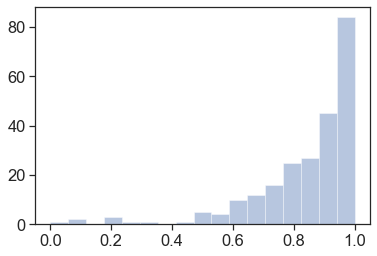

In [243]:
seaborn.distplot(fc[:,0]/np.sum(fc,axis=1),kde=0)

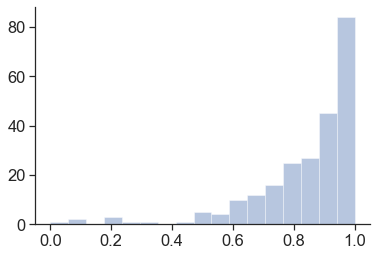

In [244]:
seaborn.distplot(fc[:,0]/np.sum(fc,axis=1),kde=0)
seaborn.despine()

In [245]:
np.mean(fc[:,0]/np.sum(fc,axis=1))

0.8407680205236784

In [246]:
[[np.mean(i[-10:]),j,len(i)] for j,i in allR_dict['459849_None_2'].items() if len(i)>5]

[[0.9, '60', 84],
 [0.9, '82', 74],
 [0.8, '74', 78],
 [0.7, '01', 87],
 [1.0, '15', 67],
 [1.0, '23', 70],
 [1.0, '36', 78],
 [0.9, '48', 72],
 [1.0, '57', 78]]

In [247]:
    mu_transs = [np.mean(i) for i in allR_dict['459849_3_2'].values() if len(i)>0]


In [248]:
from statsmodels.stats.proportion import proportion_confint

In [249]:
stt.binom_test(15,100,p=0.09)

0.051396053885998313

In [255]:
pairs = []
ctr = 0 
for i,j in zip([i for i in dat_dict['port']],[i for i in dat_dict['state']]):
    #if
    ctr += 1
    if np.abs(i[2] - j[2])<.05:
        if [i[0],j[0]] not in [i[:2] for i in pairs]:
            pairs.append([i[0],j[0]])

In [257]:
len(pairs)

6

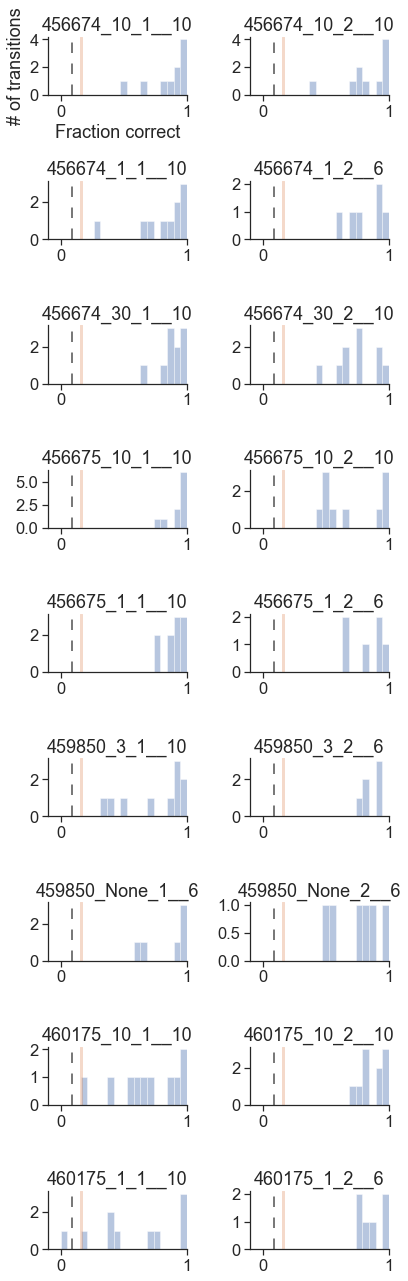

In [155]:
plt.figure(figsize=(6,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if (('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k) or ('850_None' in k) or ('30' in k):
        plt.subplot(9,2,iii+1)
        plt.title(k + '__' +str(len([np.mean(i[-5:]) for i in allR_dict[k].values() if len(i)>0])))

        mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,6)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine( )

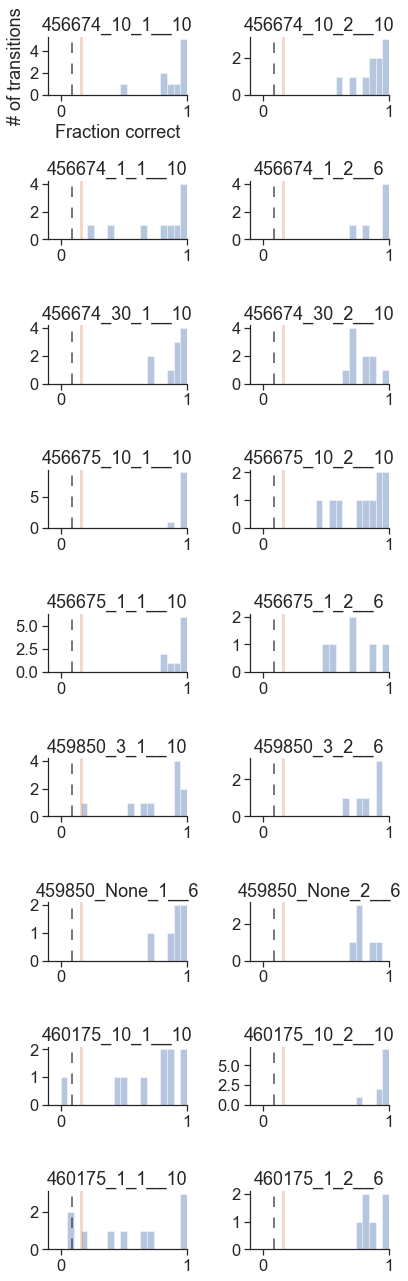

In [251]:
plt.figure(figsize=(6,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if (('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k) or ('850_None' in k) or ('30' in k):
        plt.subplot(9,2,iii+1)
        plt.title(k + '__' +str(len([np.mean(i[-5:]) for i in allR_dict[k].values() if len(i)>0])))

        mu_transs = [np.mean(i[-20:]) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,12)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine( )

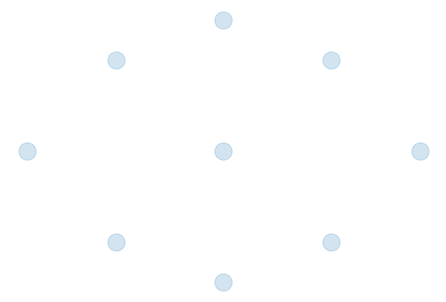

In [207]:
edges = []
for i in mu_transs:
    edges.append([int(i[0][0]),int(i[0][1])])
    
G0 = nx.DiGraph()
G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
nx.draw(G0,pos=np.array([1,-1])*poke_pos,alpha=.2)
G = nx.DiGraph()
G.add_edges_from([i for i in edges if None not in i])
nx.draw(G,
    pos=np.array([1,-1])*poke_pos,)
#drawn.append(animal+ '__' + task_nr)


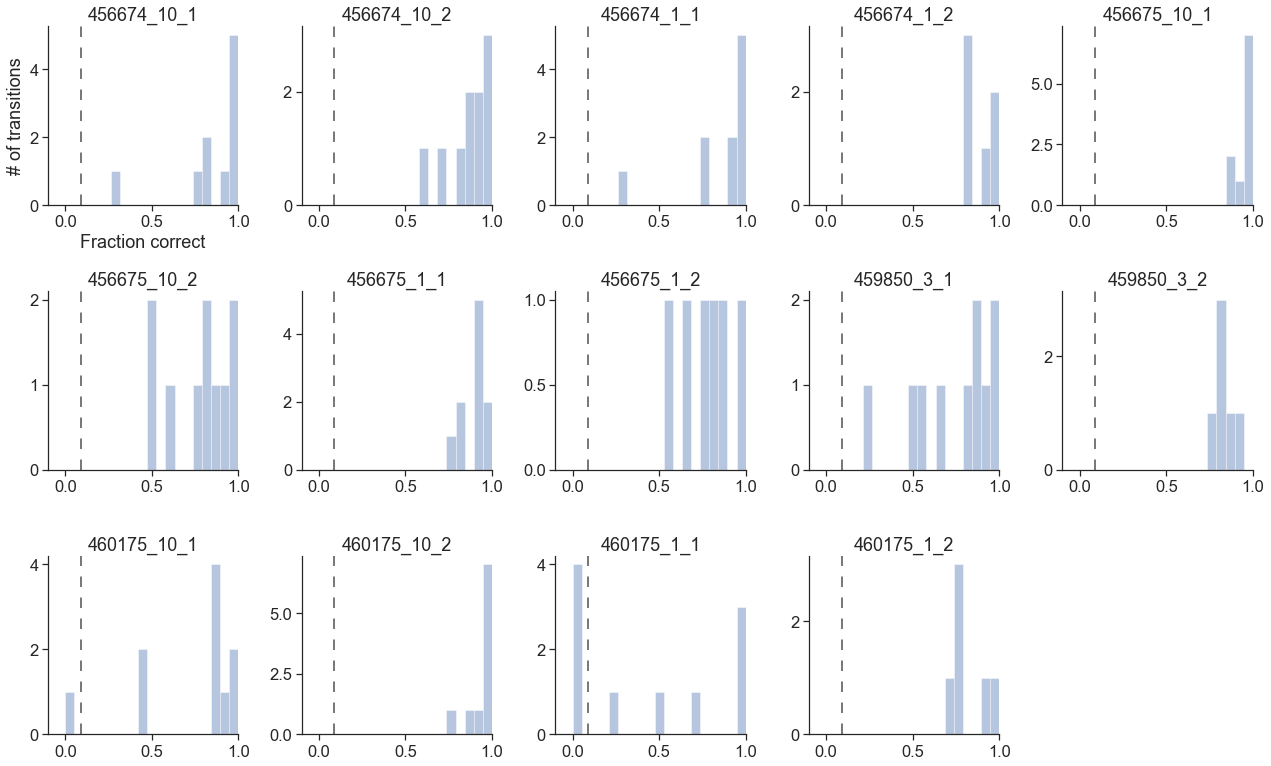

In [208]:
plt.figure(figsize=(18,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if (('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k):
        plt.subplot(5,5,iii+1)
        plt.title(k)

        mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,12)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine()

9
9
9
9
9


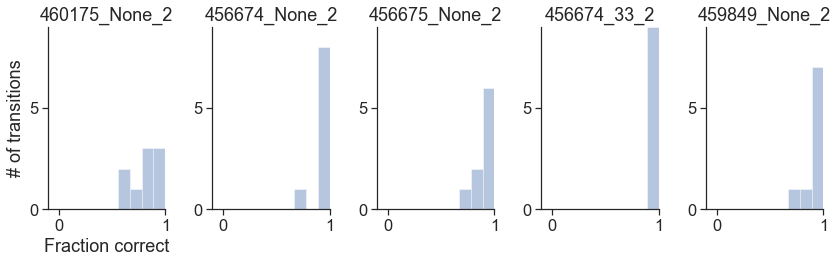

In [156]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-10:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
0
16


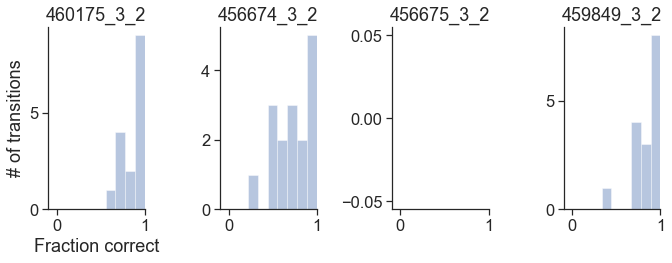

In [209]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-30:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [ ]:
'456675_3_2'

16
16
0
16


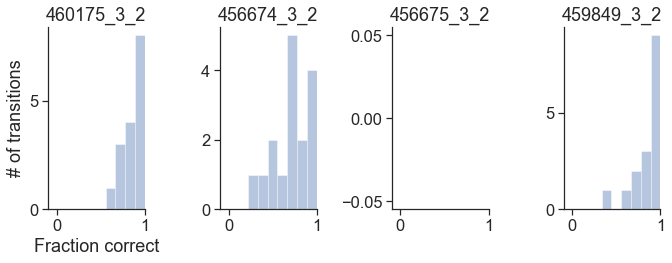

In [157]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-20:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
16
16


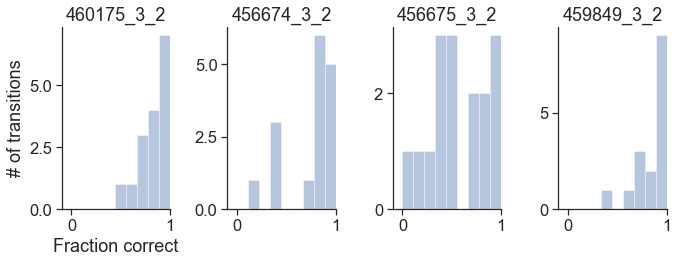

In [3467]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
16
16


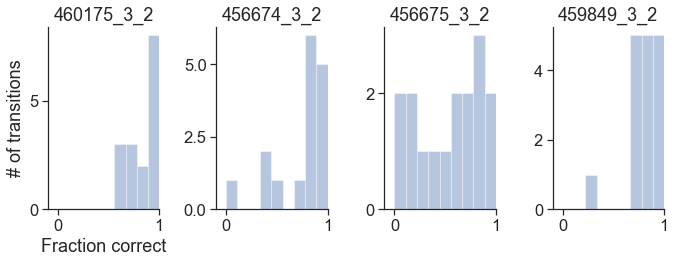

In [3533]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-200:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
0
16


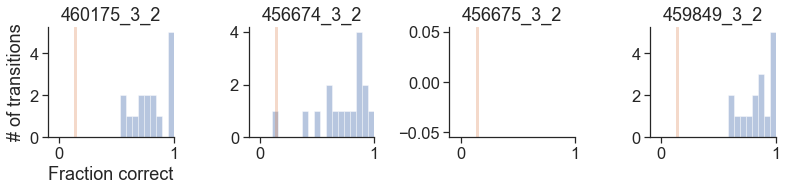

In [105]:
plt.figure(figsize=(14,3))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-200:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
    plt.axvline(x=0.14,color=clrs[1],alpha=.3,linewidth=3)

    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [2233]:
mu_transs

[0.8125,
 0.6923076923076923,
 0.9166666666666666,
 0.6666666666666666,
 0.9090909090909091,
 0.9523809523809523,
 0.9285714285714286,
 1.0,
 0.8888888888888888]

In [2234]:
[len(i) for i in allR_dict[k].values() if len(i)>0]

[16, 13, 12, 6, 22, 21, 14, 15, 9]

16


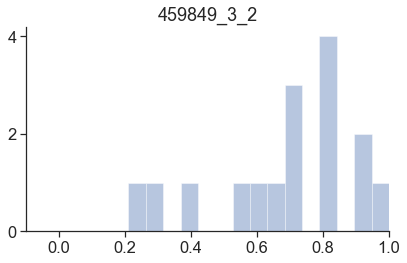

In [2777]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
#plt.ylim(0,9)
plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1822]:
i

[]

0.9743589743589743
0.9615384615384616
0.75
0.2191780821917808
0.4057971014492754
0.9866666666666667
0.9206349206349206
0.9710144927536232
0.7681159420289855
0.8857142857142857
0.7439024390243902
0.6515151515151515
0.9571428571428572
0.9615384615384616
0.9759036144578314
0.9746835443037974


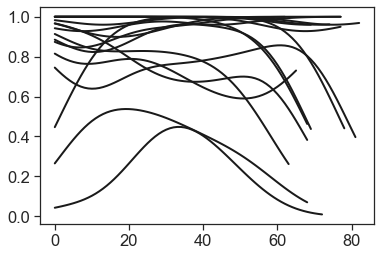

In [1830]:
from scipy.ndimage import gaussian_filter1d
ijk = 0
for i in allR_dict[k].values():
    if len(i)>0:
        #print(i)
        ijk += 1
        oi = i
        print(np.mean(i))
        plt.plot(gaussian_filter1d(np.array(i).astype('float'),10,mode='nearest'),linewidth=2,color='k')

In [1826]:
gaussian_filter1d(oi,5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

16


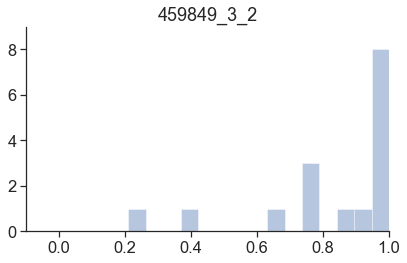

In [1833]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
plt.ylim(0,9)
#plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1804]:
mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]


In [1805]:
mu_transs

[0.9743589743589743,
 0.9615384615384616,
 0.75,
 0.2191780821917808,
 0.4057971014492754,
 0.9866666666666667,
 0.9206349206349206,
 0.9710144927536232,
 0.7681159420289855,
 0.8857142857142857,
 0.7439024390243902,
 0.6515151515151515,
 0.9571428571428572,
 0.9615384615384616,
 0.9759036144578314,
 0.9746835443037974]

In [1793]:


len(mu_transs)

16

16


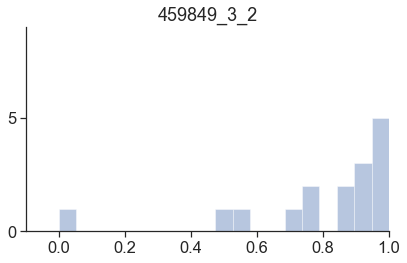

In [1614]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i[-20:]) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
plt.ylim(0,9)
plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1203]:
np.min(mu_transs)

0.0

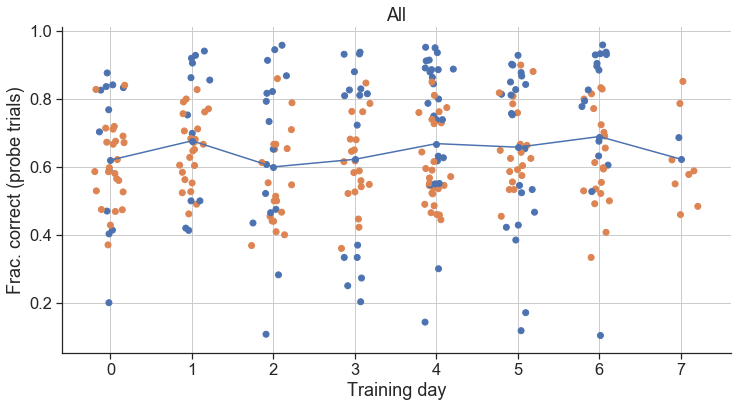

In [1678]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

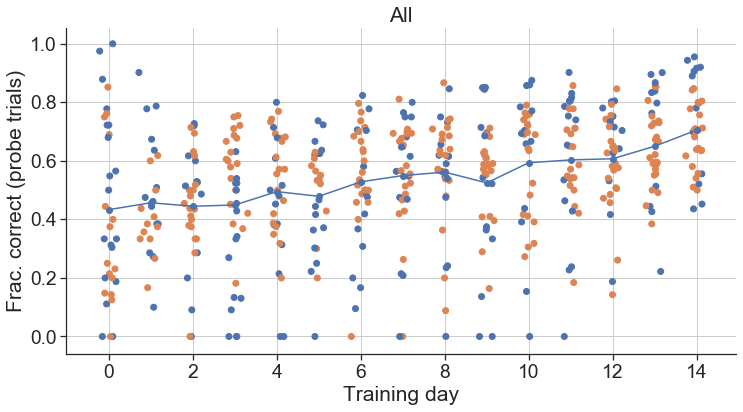

In [470]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

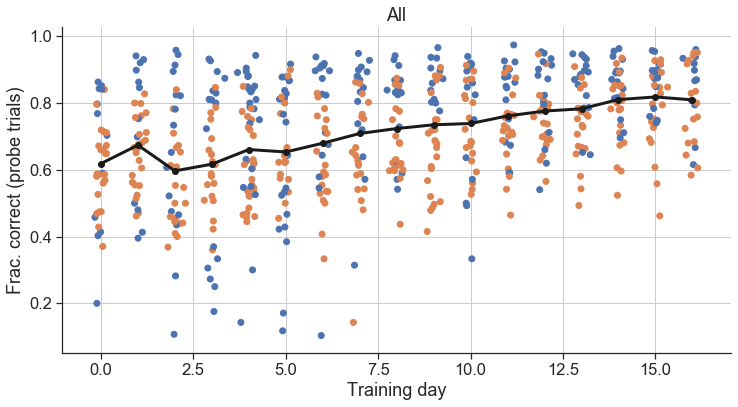

In [3586]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],
         marker='o',linewidth=3,color='k')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

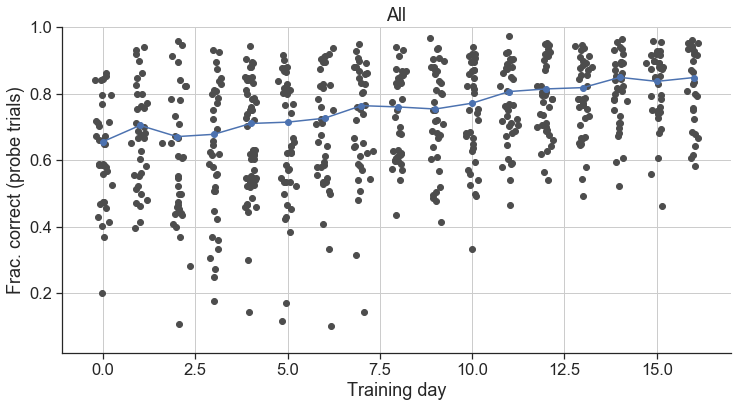

In [3585]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.mean(np.hstack(i['pkA'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

In [55]:
len([np.mean(i) for i in allRes[ctr]['pkNR2']])

18

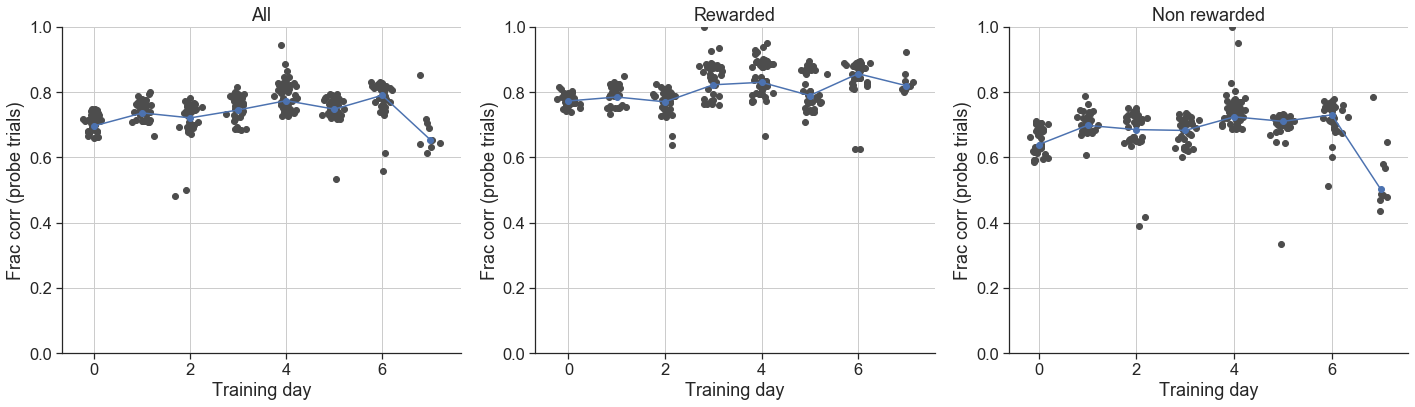

In [1679]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("All")
plt.plot([np.mean(np.hstack(i['pkA2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,3,2)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,3,3)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()

In [73]:
len([np.mean(i) for i in allRes[ctr]['pkNR2']])

18

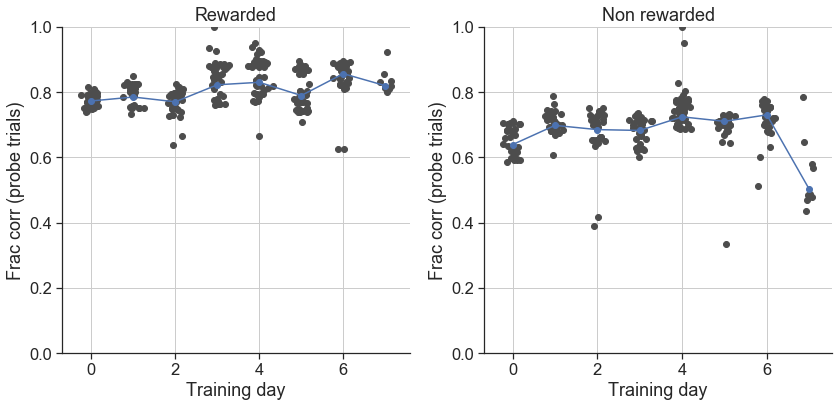

In [1680]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,2,2)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()

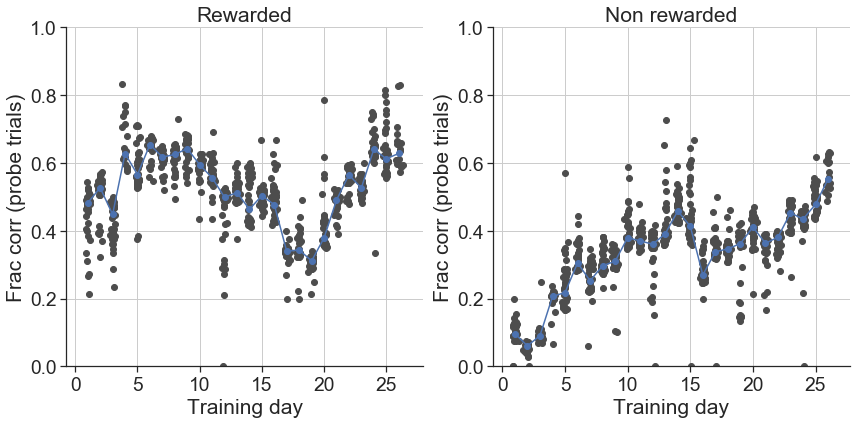

In [410]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,2,2)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()